# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | aykhal
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | sukagawa
Processing Record 9 of Set 1 | lihue
Processing Record 10 of Set 1 | tura
Processing Record 11 of Set 1 | timbuktu
Processing Record 12 of Set 1 | al mindak
Processing Record 13 of Set 1 | yanchep
Processing Record 14 of Set 1 | citrus springs
Processing Record 15 of Set 1 | zemetchino
Processing Record 16 of Set 1 | anadyr
Processing Record 17 of Set 1 | aksu
Processing Record 18 of Set 1 | ta`u
Processing Record 19 of Set 1 | uporovo
Processing Record 20 of Set 1 | prince george
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 | port-aux-francais
Processing Record 23 of Set 1 |

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,280.40,65,0,2.57,CL,1724966779
1,jamestown,42.0970,-79.2353,299.27,73,100,4.12,US,1724966780
2,ilulissat,69.2167,-51.1000,278.16,87,75,1.03,GL,1724966781
3,aykhal,66.0000,111.5000,279.73,65,94,3.23,RU,1724966782
4,waitangi,-43.9535,-176.5597,285.27,98,100,2.24,NZ,1724966784


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,280.40,65,0,2.57,CL,1724966779
1,jamestown,42.0970,-79.2353,299.27,73,100,4.12,US,1724966780
2,ilulissat,69.2167,-51.1000,278.16,87,75,1.03,GL,1724966781
3,aykhal,66.0000,111.5000,279.73,65,94,3.23,RU,1724966782
4,waitangi,-43.9535,-176.5597,285.27,98,100,2.24,NZ,1724966784


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

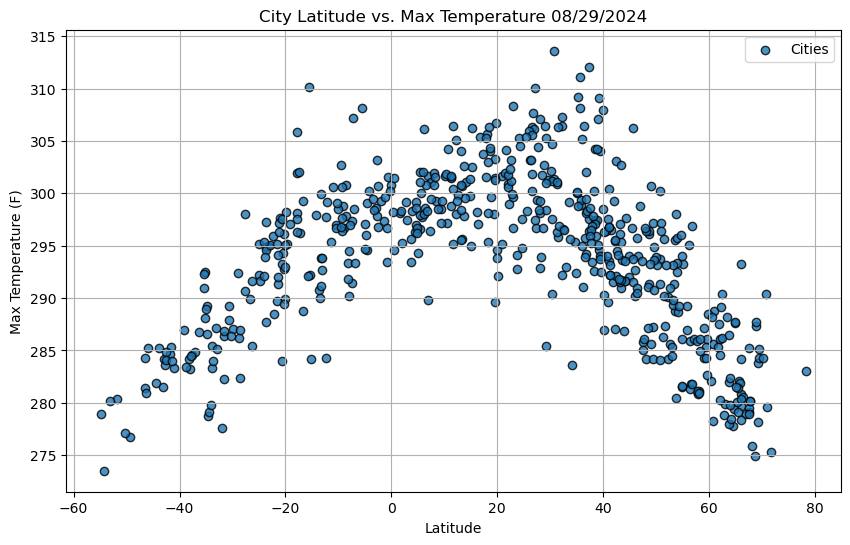

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"], 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature " + time.strftime("%m/%d/%Y"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Add legend
plt.legend()


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

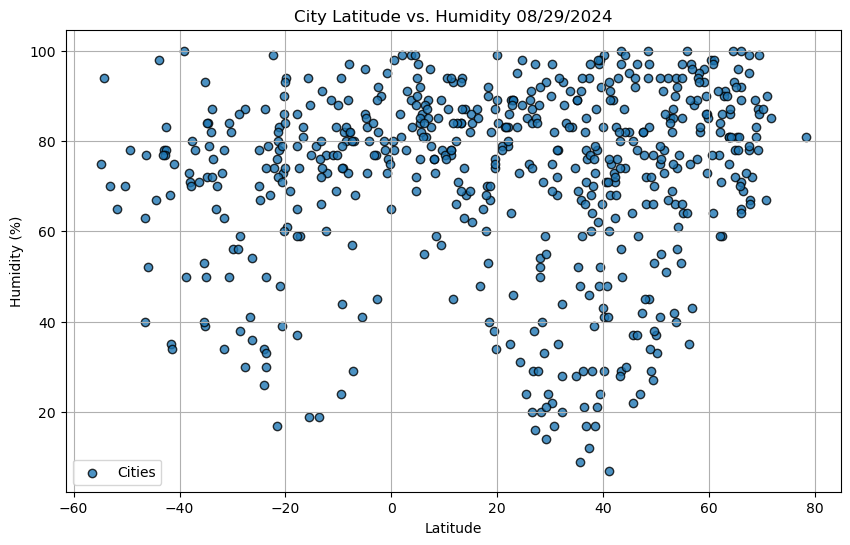

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity " + time.strftime("%m/%d/%Y"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Add legend
plt.legend()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

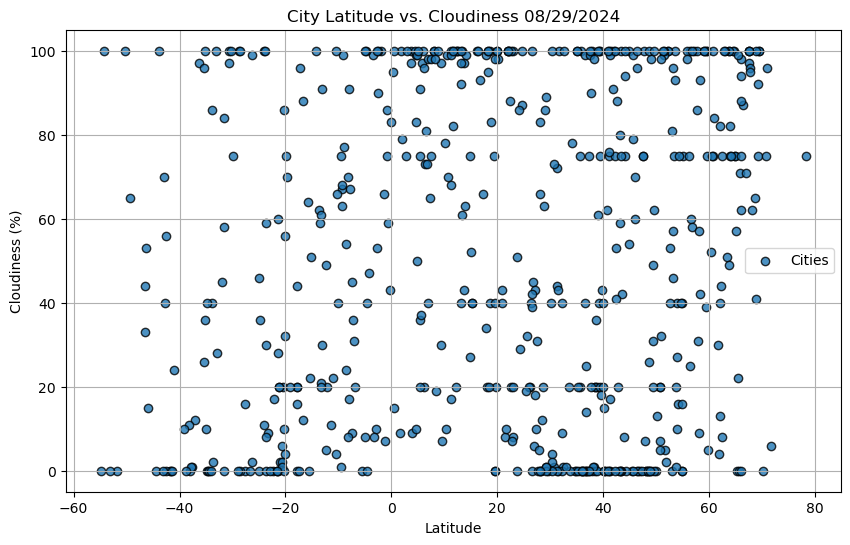

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness " + time.strftime("%m/%d/%Y"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

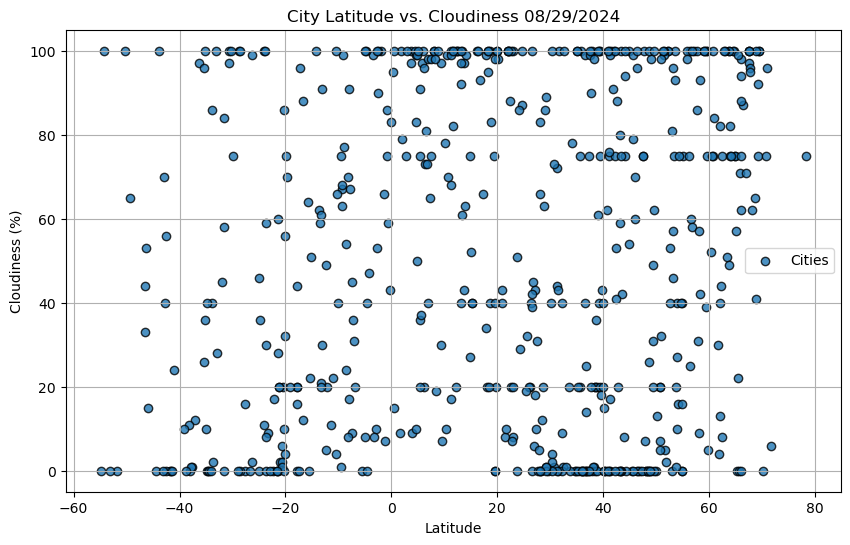

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness " + time.strftime("%m/%d/%Y"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Add legend
plt.legend()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
def plot_linear_regression(x_values, y_values, title, ylabel, xlabel, filename):
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
    
    # Calculate linear regression
    (slope, intercept, r_value, p_value, std_err) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.4f}x + {intercept:.4f}"
    
    # Plot regression line
    plt.plot(x_values, regress_values, 'r', label='Linear Regression')
    
    # Set labels and title
    plt.title(f"{title} " + time.strftime("%m/%d/%Y"))
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.grid(True)
    
    # Add line equation and r-squared value
    plt.annotate(f"Line Equation: {line_eq}", xy=(0.05, 0.95), xycoords='axes fraction')
    plt.annotate(f"R-squared: {r_value**2:.4f}", xy=(0.05, 0.90), xycoords='axes fraction')
    
    # Save the figure
    plt.savefig(f"../output_data/{filename}")
    
    # Show plot
    plt.show()
    
    # Print the r-value
    print(f"The r-value is: {r_value}")

    # Return slope and r_value
    return slope, r_value

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jamestown,42.0970,-79.2353,299.27,73,100,4.12,US,1724966780
2,ilulissat,69.2167,-51.1000,278.16,87,75,1.03,GL,1724966781
3,aykhal,66.0000,111.5000,279.73,65,94,3.23,RU,1724966782
7,sukagawa,37.2833,140.3833,297.51,94,75,2.06,JP,1724966787
8,lihue,21.9789,-159.3672,300.92,79,100,5.66,US,1724966788


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,280.40,65,0,2.57,CL,1724966779
4,waitangi,-43.9535,-176.5597,285.27,98,100,2.24,NZ,1724966784
5,blackmans bay,-43.0167,147.3167,284.22,78,70,0.89,AU,1724966785
6,adamstown,-25.0660,-130.1015,292.24,70,46,5.83,PN,1724966786
12,yanchep,-31.5500,115.6833,286.38,78,84,6.13,AU,1724966643


###  Temperature vs. Latitude Linear Regression Plot

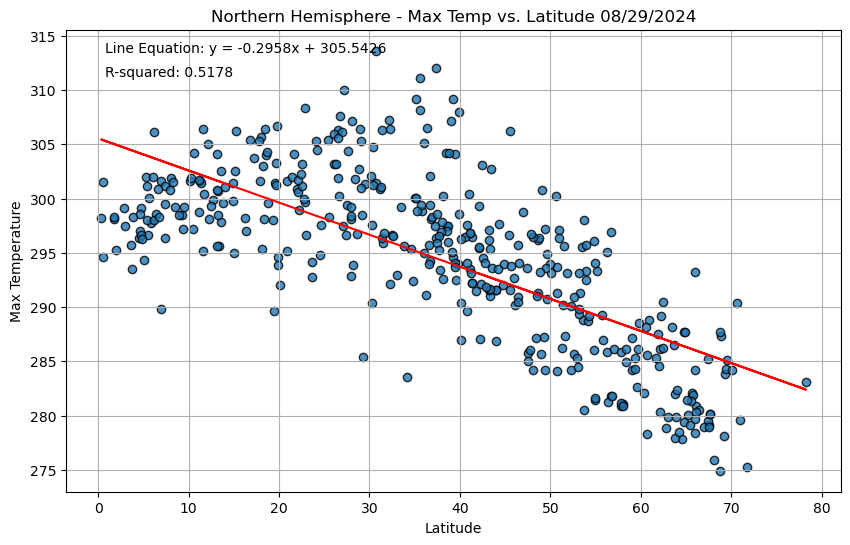

The r-value is: -0.7196160193559642


In [41]:
# Linear regression on Northern Hemisphere
temp_slope, temp_r_value = plot_linear_regression(northern_hemi_df["Lat"], 
                                                  northern_hemi_df["Max Temp"],
                                                  "Northern Hemisphere - Max Temp vs. Latitude",
                                                  "Max Temperature",
                                                  "Latitude",
                                                  "Fig5.png")

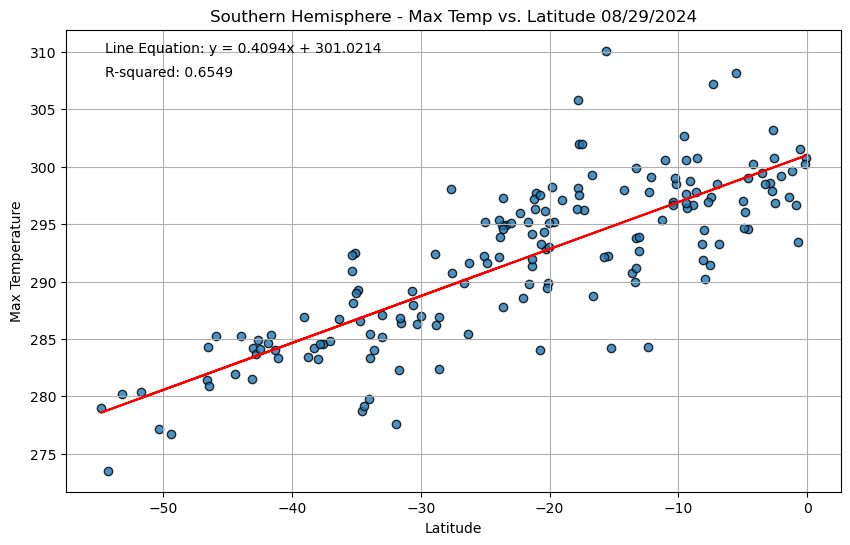

The r-value is: 0.8092867998823142


In [42]:
# Linear regression on Northern Hemisphere
temp_slope, temp_r_value = plot_linear_regression(southern_hemi_df["Lat"], 
                                                  southern_hemi_df["Max Temp"],
                                                  "Southern Hemisphere - Max Temp vs. Latitude",
                                                  "Max Temperature",
                                                  "Latitude",
                                                  "Fig6.png")

**Discussion about the linear relationship:** The linear regression seem to be opposites in terms of slope. This shows the closer we arrive at the equator, the higher temps we get.

### Humidity vs. Latitude Linear Regression Plot

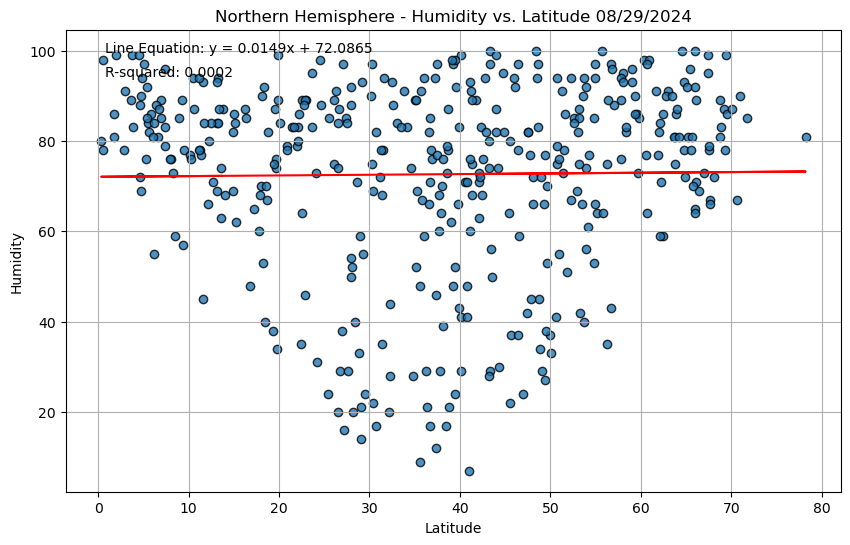

The r-value is: 0.013267996569565331


In [43]:
# Northern Hemisphere
hum_slope, hum_r_value = plot_linear_regression(northern_hemi_df["Lat"], 
                                                  northern_hemi_df["Humidity"],
                                                  "Northern Hemisphere - Humidity vs. Latitude",
                                                  "Humidity",
                                                  "Latitude",
                                                  "Fig7.png")

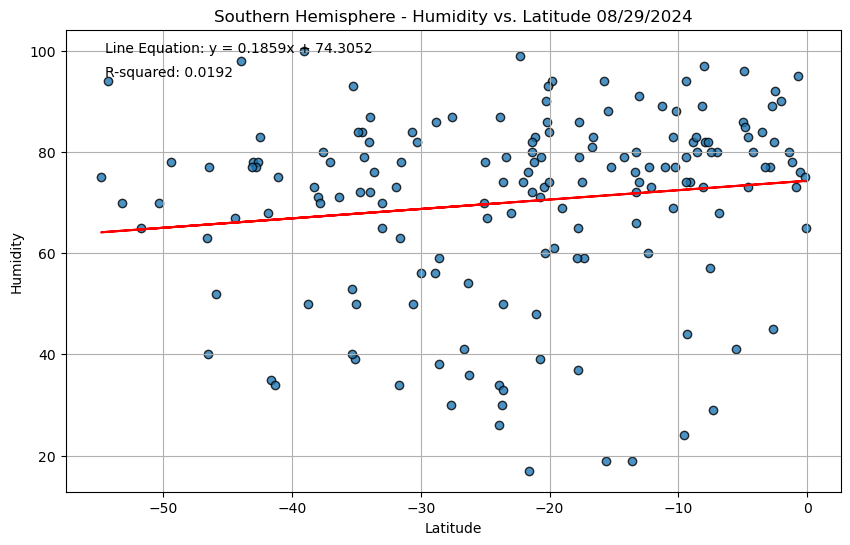

The r-value is: 0.1386054460111323


In [44]:
# Southern Hemisphere
hum_slope, hum_r_value = plot_linear_regression(southern_hemi_df["Lat"], 
                                                  southern_hemi_df["Humidity"],
                                                  "Southern Hemisphere - Humidity vs. Latitude",
                                                  "Humidity",
                                                  "Latitude",
                                                  "Fig8.png")

**Discussion about the linear relationship:** Humidity seems to be less predictable with these two charts.

### Cloudiness vs. Latitude Linear Regression Plot

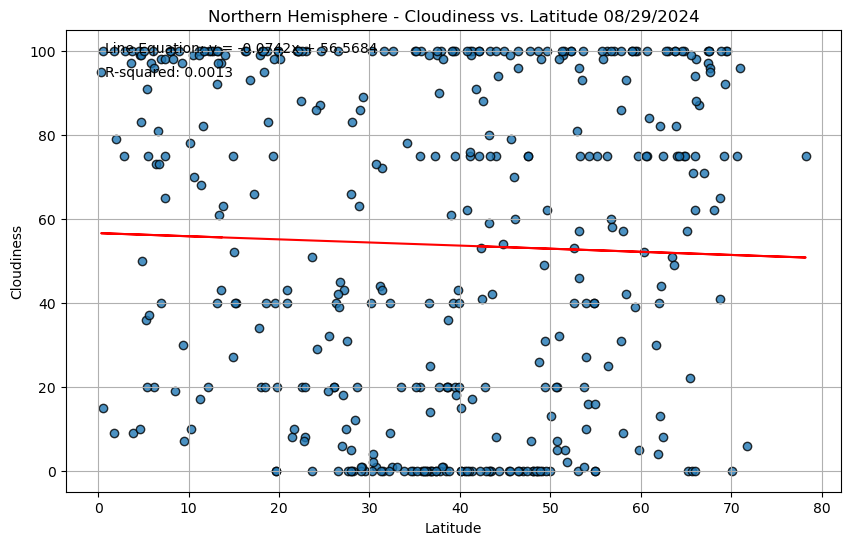

The r-value is: -0.036075449204846864


In [45]:
# Northern Hemisphere
clo_slope, clo_r_value = plot_linear_regression(northern_hemi_df["Lat"], 
                                                  northern_hemi_df["Cloudiness"],
                                                  "Northern Hemisphere - Cloudiness vs. Latitude",
                                                  "Cloudiness",
                                                  "Latitude",
                                                  "Fig9.png")

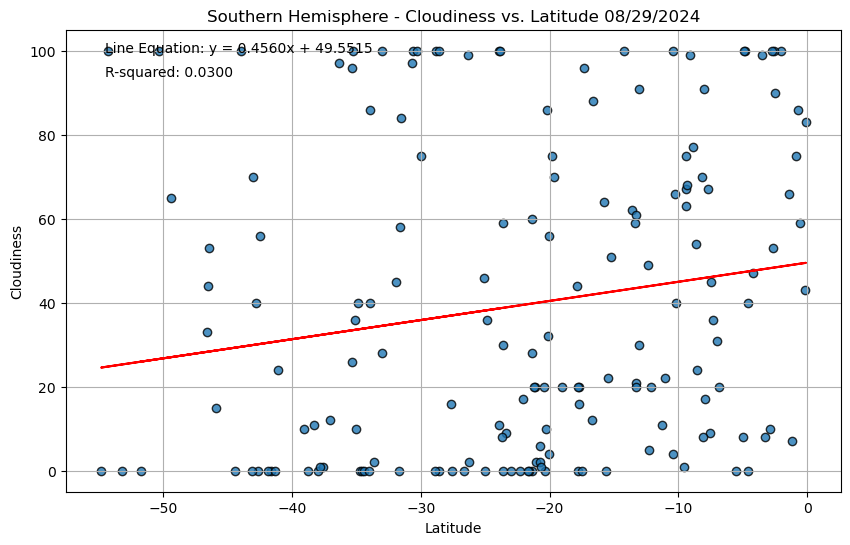

The r-value is: 0.17320516756593607


In [46]:
# Southern Hemisphere
clo_slope, clo_r_value = plot_linear_regression(southern_hemi_df["Lat"], 
                                                  southern_hemi_df["Cloudiness"],
                                                  "Southern Hemisphere - Cloudiness vs. Latitude",
                                                  "Cloudiness",
                                                  "Latitude",
                                                  "Fig10.png")

**Discussion about the linear relationship:** Cloudiness does not have a major linear regression for both north and south hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

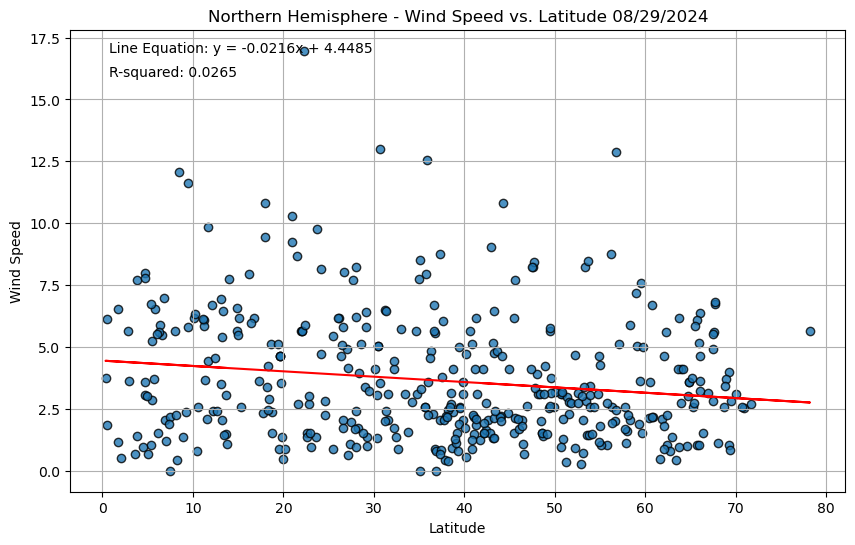

The r-value is: -0.1628038097754457


In [47]:
# Northern Hemisphere
win_slope, win_r_value = plot_linear_regression(northern_hemi_df["Lat"], 
                                                  northern_hemi_df["Wind Speed"],
                                                  "Northern Hemisphere - Wind Speed vs. Latitude",
                                                  "Wind Speed",
                                                  "Latitude",
                                                  "Fig11.png")

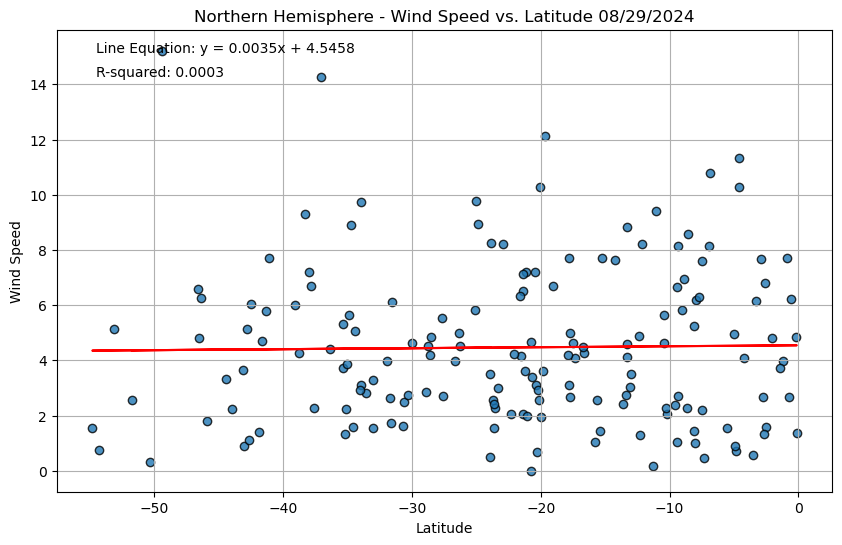

The r-value is: 0.017012353568066744


In [48]:
# Southern Hemisphere
win_slope, win_r_value = plot_linear_regression(southern_hemi_df["Lat"], 
                                                  southern_hemi_df["Wind Speed"],
                                                  "Northern Hemisphere - Wind Speed vs. Latitude",
                                                  "Wind Speed",
                                                  "Latitude",
                                                  "Fig12.png")

**Discussion about the linear relationship:** Wind speed does not show too much of a linear regression same as cloudiness.